In [5]:
# Imports
import torch
import math
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

torch.manual_seed(0);

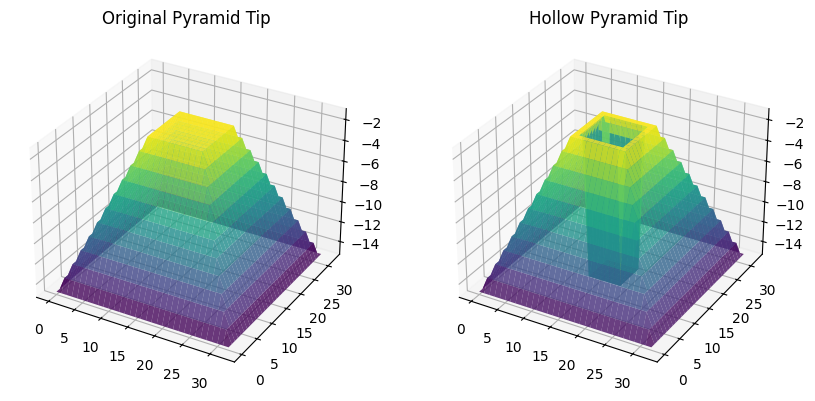

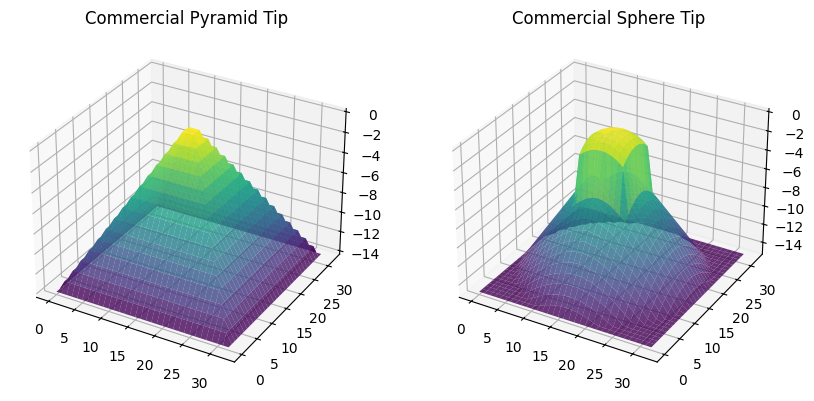

In [20]:
# Assume you have already defined generate_filled_tip function
def generate_filled_tip(size, size_top, height):
    tip = torch.zeros((size, size), dtype=torch.float32)
    x = tip.shape[0]
    y = tip.shape[1]

    for i in range(x // 2 - size_top // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                tip[j, h] = i / (x // 2 - size_top // 2) * height
    tip = tip - height

    return tip

def generate_hollow_tip(size, size_top, height):
    tip = generate_filled_tip(size, size_top, height)
    for i in range(size // 2 - size_top // 2 + 1, size // 2 + size_top // 2):
        for j in range(size // 2 - size_top // 2 + 1, size // 2 + size_top // 2):
            tip[i,j] = torch.min(tip)
    return tip

def generate_commercial_tip_pyramid(size, height):
    tip = torch.zeros((size, size), dtype=float)
    x = tip.shape[0]

    for i in range(x // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                tip[j, h] = i / (x // 2) * height
    tip = tip - torch.max(tip)

    return tip

def generate_commercial_tip_sphere(size, sphere_radius, height):
    tip = torch.zeros((size, size), dtype=float)
    x = tip.shape[0]
    y = tip.shape[1]
    
    for i in range(x // 2 - sphere_radius // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                d = math.sqrt((j - x // 2) ** 2. + (h - x // 2) ** 2.)
                if d <= (x // 2):
                    tip[j, h] = (x // 2 - d) * (height - sphere_radius) / (x // 2 - sphere_radius)
    for i in range(x // 2 - sphere_radius // 2, x // 2 + 1):
        for j in range(i, x - i):
            for h in range(i, x - i):            
                d = math.sqrt((j - x // 2) ** 2. + (h - x // 2) ** 2.0)
                if d <= sphere_radius:
                    tip[j, h] = height - sphere_radius + math.sqrt(sphere_radius ** 2. - d ** 2.)

    tip = tip - torch.max(tip)

    return tip

# Generate pyramid tip and hollow tip
tip_size = 33
tip_size_top = 9
tip_height = 15
pyramid_tip = generate_filled_tip(tip_size, tip_size_top, tip_height)
pyramid_tip_hollow = generate_hollow_tip(tip_size, tip_size_top, tip_height)
commerial_tip_pyramid = generate_commercial_tip_pyramid(tip_size, tip_height)
commerial_tip_sphere = generate_commercial_tip_sphere(tip_size, tip_size_top // 2, tip_height)

# Create a meshgrid
x, y = torch.meshgrid(torch.arange(tip_size), torch.arange(tip_size))

# Plot the original and hollow pyramid tips in 3D
fig = plt.figure(figsize=(10, 5))

# Original Pyramid Tip
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, pyramid_tip, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Original Pyramid Tip')

# Hollow Pyramid Tip
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, pyramid_tip_hollow, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Hollow Pyramid Tip')

# Plot the commercial tips in 3D
fig = plt.figure(figsize=(10, 5))

# Commercial Pyramid Tip
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, commerial_tip_pyramid, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Commercial Pyramid Tip')

# Commercial Sphere Tip
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, commerial_tip_sphere, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Commercial Sphere Tip')

plt.show()


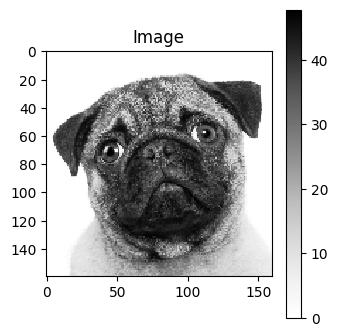

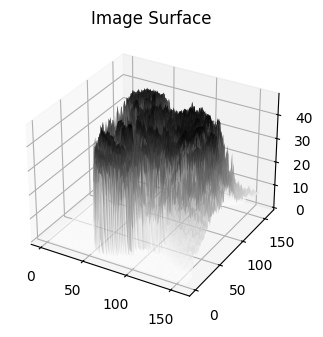

In [13]:
def generate_periodic_square_surface(size, feature_size, height, T):
    surface = torch.zeros((size, size), dtype=torch.float32)

    for i in range(0, size, T):
        for j in range(0, size, T):
            surface[:,j:j+feature_size] = height

    return surface

def generate_periodic_pyramid_surface(size, feature_size, height, T):
    surface = torch.zeros((size, size), dtype=torch.float32)

    for x in range(0, size, T):
        for y in range(0, size, T):
            for i in range(feature_size // 2):
                for j in range(i, feature_size - i):
                    for h in range(i, feature_size - i):
                        surface[j + x, h + y] = i / (feature_size // 2) * height
                # surface[i : i + feature_size, j : j + feature_size] = height

    return surface

def generate_periodic_paraboloid_surface(size, feature_size, height, T):
    surface = torch.zeros((size, size), dtype=torch.float32)

    for x in range(0, size, T):
        for y in range(0, size, T):
            for i in range(feature_size):
                for j in range(i, feature_size - i):
                    for h in range(i, feature_size - i):
                        surface[j + x, h + y] = math.sin(i / (feature_size) * math.pi) * height

    return surface

def generate_image_surface(image_file, size, height):
    import cv2
    import os

    assert os.path.exists(image_file), f"Image file does not exist: {image_file}"
    img = cv2.imread(image_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (size, size))
    img = torch.from_numpy(img).float()
    img = img / 255.0
    img = img * height
    return img

# Example: Generate a surface with periodic square features
size = tip_size * 8
feature_size = int(size // 5)
periodicity = int(size // 5)
height = 50

# periodic_square_surface = generate_periodic_square_surface(size, feature_size, height, periodicity)
# periodic_square_surface = generate_periodic_wave_surface(size, feature_size, height, periodicity)
# periodic_square_surface = generate_periodic_triangle_surface(size, feature_size, height, periodicity)
# periodic_square_surface = generate_periodic_delta_surface(size, feature_size, height, periodicity)
# periodic_square_surface = generate_periodic_spiked_surface(size, feature_size, height, periodicity)
# periodic_square_surface = generate_periodic_pyramid_surface(size, feature_size, height, periodicity)
periodic_square_surface = height - generate_image_surface('dog.jpg', size, height)

# Plot the 2D array as a heatmap
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(periodic_square_surface, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Image')

# Plot the surface in 3D
x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, periodic_square_surface, cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Image Surface')

plt.show()

In [6]:
def idilation(surface, tip):
    surf_xsiz, surf_ysiz = surface.shape
    tip_xsiz, tip_ysiz = tip.shape
    xc = tip_xsiz // 2
    yc = tip_ysiz // 2

    padded_surface = F.pad(surface.unsqueeze(0).unsqueeze(0), (yc, yc, xc, xc), mode='constant', value=0)

    # Create a sliding window view of the padded surface
    window_shape = tip.shape
    strides = padded_surface.stride()[2:] * 2
    windows = torch.as_strided(padded_surface, (surf_xsiz, surf_ysiz) + window_shape, strides)

    # Perform the dilation operation
    dilated = torch.amax(windows + tip.view(1, 1, tip_xsiz, tip_ysiz), dim=(2, 3))

    return dilated.squeeze(0).squeeze(0)

In [7]:
def ierosion(surface, tip):
    surf_xsiz, surf_ysiz = surface.shape
    tip_xsiz, tip_ysiz = tip.shape
    xc = tip_xsiz // 2
    yc = tip_ysiz // 2

    padded_surface = F.pad(surface.unsqueeze(0).unsqueeze(0), (yc, yc, xc, xc), mode='constant', value=0)

    # Create a sliding window view of the padded surface
    window_shape = tip.shape
    strides = padded_surface.stride()[2:] * 2
    windows = torch.as_strided(padded_surface, (surf_xsiz, surf_ysiz) + window_shape, strides)

    # Perform the erosion operation
    eroded = torch.amin(windows - tip.view(1, 1, tip_xsiz, tip_ysiz), dim=(2, 3))

    return eroded.squeeze(0).squeeze(0)

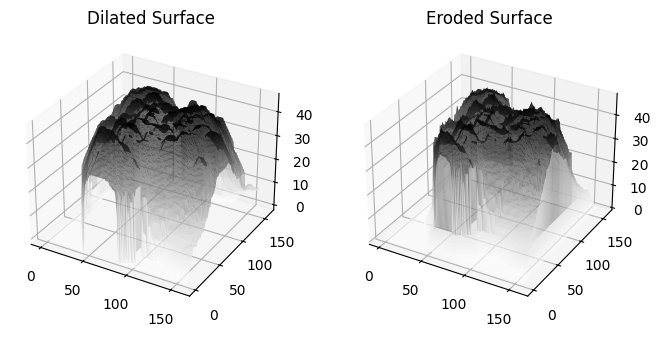

In [8]:
# Plot the surface in 3D
x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, idilation(periodic_square_surface, pyramid_tip), cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Dilated Surface')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, ierosion(idilation(periodic_square_surface, pyramid_tip), pyramid_tip), cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Eroded Surface')

plt.show()

In [9]:
# Blind-tip reconstruction from Image and Surface

def loss(r_surface, surface, tip, fn):
    return F.mse_loss(r_surface, fn(surface, tip))

def plot_reconstructed_tip(original_tip, reconstructed_tip):
    fig = plt.figure(figsize=(10, 5))
    x, y = torch.meshgrid(torch.arange(tip_size), torch.arange(tip_size))

    # Original Pyramid Tip
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, original_tip, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
    ax1.set_title('Original Tip')

    # Hollow Pyramid Tip
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(x, y, reconstructed_tip, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
    ax2.set_title('Reconstructed Tip')

    plt.show()

def optimize(surface, original_tip, tip, epochs, fn, lr, min_loss=1e-3):
    r_surface = fn(surface, original_tip)

    losses = []
    optimizer = optim.Adam([tip], lr=lr)

    t = tqdm(range(epochs))
    for epoch in t:
        optimizer.zero_grad()

        loss_val = loss(r_surface, surface, tip, fn)
        loss_val.backward()

        optimizer.step()

        description = f'Epoch: {epoch}, Loss: {loss_val.item():.4f}'
        t.set_description(description)
        if epoch % (epochs // 10) == 0:
            with torch.no_grad():
                print(description)
                # plot_reconstructed_tip(original_tip, tip)

        losses.append(loss_val.item())

        # Early stopping
        # 1. If loss is less than min_loss
        # 2. If loss hasn't decreased over the last 10 epochs
        if loss_val.item() < min_loss:
            print('Loss is less than min_loss')
            break
        elif epoch > 10 and losses[-1] >= losses[-10]:
            print('Loss has not decreased over the last 10 epochs')
            break

    return tip, losses

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 7.9343
Epoch: 50, Loss: 4.1445
Epoch: 100, Loss: 2.5692
Epoch: 150, Loss: 1.6425
Epoch: 200, Loss: 0.9518
Epoch: 250, Loss: 0.4986
Epoch: 300, Loss: 0.2684
Epoch: 350, Loss: 0.1426
Epoch: 400, Loss: 0.0756
Epoch: 450, Loss: 0.0359


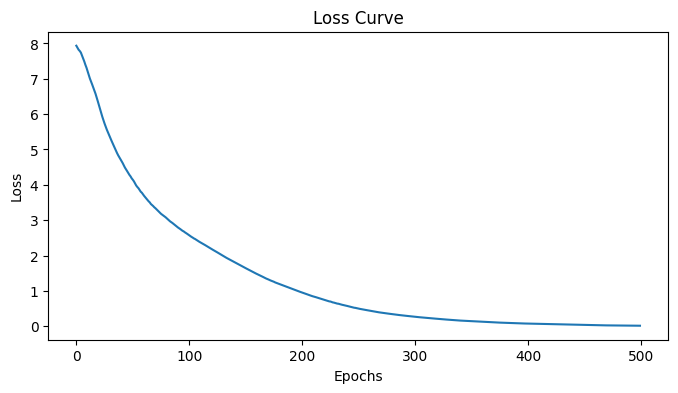

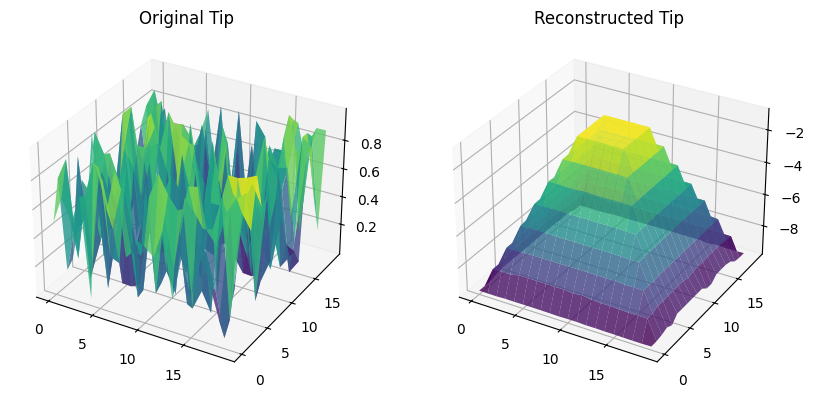

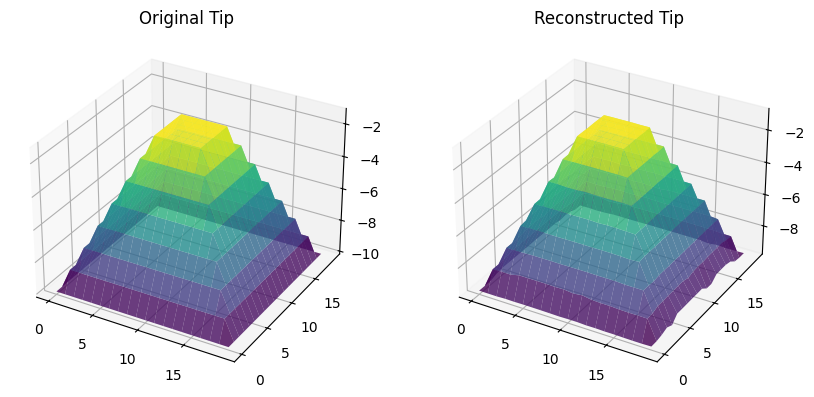

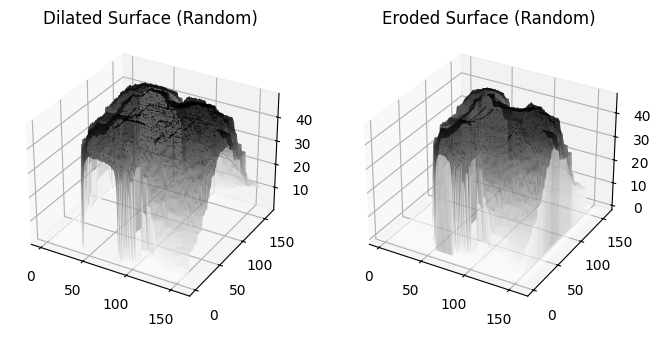

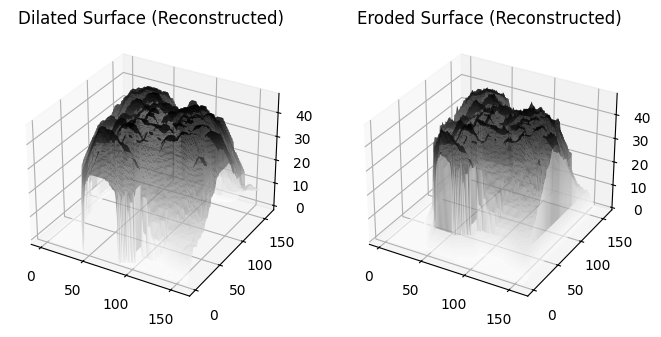

In [10]:
# Run the optimization
epochs = 500
lr = 0.1
random_tip = torch.rand((tip_size, tip_size), requires_grad=True)
original_random_tip = random_tip.clone().detach()
idilation_and_ierosion = lambda surface, tip: ierosion(idilation(surface, tip), tip)
reconstructed_tip, losses = optimize(periodic_square_surface, pyramid_tip, random_tip, epochs, idilation_and_ierosion, lr)

# Plot the loss curve
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the reconstructed tip
plot_reconstructed_tip(original_random_tip, reconstructed_tip.detach())
plot_reconstructed_tip(pyramid_tip, reconstructed_tip.detach())

# Plot the surface in 3D
x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, idilation(periodic_square_surface, original_random_tip), cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Dilated Surface (Random)')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, ierosion(idilation(periodic_square_surface, original_random_tip), original_random_tip), cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Eroded Surface (Random)')

# Plot the surface in 3D
x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, idilation(periodic_square_surface, reconstructed_tip.detach()), cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Dilated Surface (Reconstructed)')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, ierosion(idilation(periodic_square_surface, reconstructed_tip.detach()), reconstructed_tip.detach()), cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Eroded Surface (Reconstructed)')

plt.show()

Text(0.5, 1.0, 'Reconstructed Surface from Reconstructed Tip')

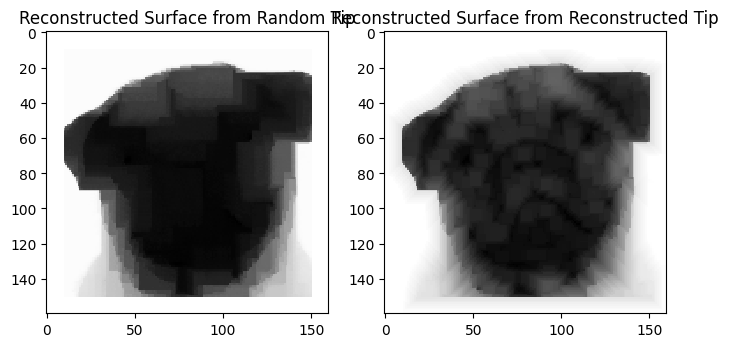

In [14]:
# Plot the 2D array as a heatmap
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ierosion(idilation(periodic_square_surface, original_random_tip), original_random_tip), cmap='Greys', interpolation='nearest')
# plt.colorbar()
plt.title('Surface from Random Tip')

# Plot the 2D array as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(ierosion(idilation(periodic_square_surface, reconstructed_tip.detach()), reconstructed_tip.detach()), cmap='Greys', interpolation='nearest')
# plt.colorbar()
plt.title('Surface from Reconstructed Tip')

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 11.4110
Epoch: 50, Loss: 7.8251
Epoch: 100, Loss: 5.7689
Epoch: 150, Loss: 4.1845
Epoch: 200, Loss: 3.1069
Epoch: 250, Loss: 2.2809
Epoch: 300, Loss: 1.6533
Epoch: 350, Loss: 1.1985
Epoch: 400, Loss: 0.8549
Epoch: 450, Loss: 0.6031


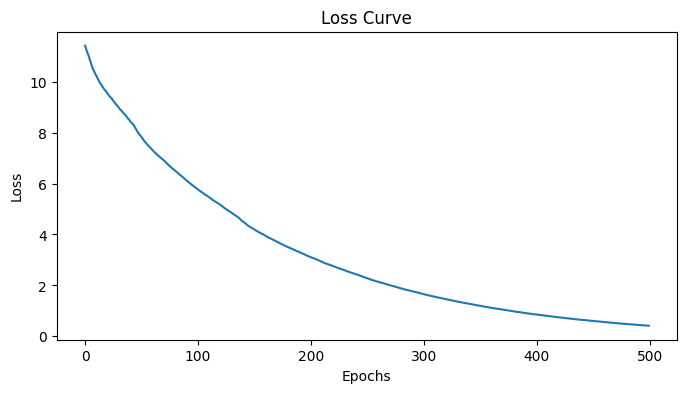

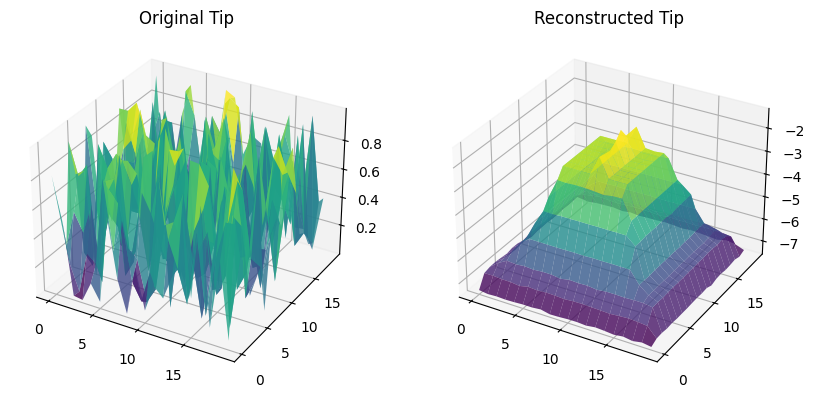

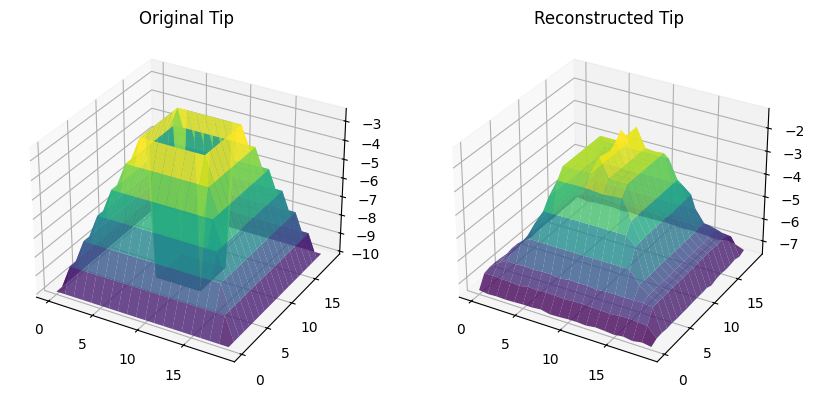

In [9]:
# Run the optimization
epochs = 500
lr = 0.1
random_tip = torch.rand((tip_size, tip_size), requires_grad=True)
original_random_tip = random_tip.clone().detach()
idilation_and_ierosion = lambda surface, tip: ierosion(idilation(surface, tip), tip)
reconstructed_tip, losses = optimize(periodic_square_surface, pyramid_tip_hollow, random_tip, epochs, idilation_and_ierosion, lr)

# Plot the loss curve
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the reconstructed tip
plot_reconstructed_tip(original_random_tip, reconstructed_tip.detach())
plot_reconstructed_tip(pyramid_tip_hollow, reconstructed_tip.detach())